# Written Response - Qualitative Data EDA

In [3]:
# Change working directory to be project root
import os
#os.chdir("..")
os.getcwd()

'C:\\Users\\payla\\Documents\\MDS\\Capstone\\DSCI_591_capstone-BCStats'

In [4]:
import pandas as pd
import numpy as np
#import time

from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

import matplotlib.pyplot as plt

In [5]:
# ensure packages reload after every change 
%load_ext autoreload
%autoreload 2

import src

from src.analysis.text_summary import *
from src.data.EDA_text import *

# from src.analysis.emotion_analysis import *
# from src.data.preprocessing_text import *

## Load Data

In [9]:
# read full data
data_full = pd.read_csv(".\data\interim\desensitized_qualitative-data2018.csv",
                            usecols=[0, 1, 2, 3, 4, 5, 6], 
                            names=["USERID", "text", "code1", "code2", "code3", "code4", "code5"], skiprows=1)
# read agreement data
data_agreement = pd.read_csv(".\data\interim\linking_joined_qual_quant.csv")
                           # usecols = [0, 1, 4, 5, 6])
#data_agreement.head()

,USERID,code,qual_value,quan_value,question,diff,text,theme,subtheme_description
0,191202-862188,102,-1,-1,Q39,0,"Improved office space (fix HVAC, etc) but NO LWS","Tools, Equipment & Physical Environment","Improve facilities (e.g. office space, noise l..."
1,173110-932228,14,-1,0,Q46,1,Administration people should have better oppor...,Career & Personal Development,Provide opportunities for career advancement
2,185914-180608,24,-1,-1,Q20,0,We are the lowest paid in Canada with a worklo...,Compensation & Benefits,Increase salary
3,189099-732978,35,-1,0,Q02,1,Official acknowledgement of the limited divers...,Engagement & Workplace Culture,Value diversity
4,189099-732978,35,-1,0,Q03,1,Official acknowledgement of the limited divers...,Engagement & Workplace Culture,Value diversity


In [10]:
corpus_all_str = src.analysis.text_summary.generate_corpus_from_comments(data_agreement, sentences=False)
corpus_all = src.analysis.text_summary.generate_corpus_from_comments(data_agreement)

## Sentence EDA

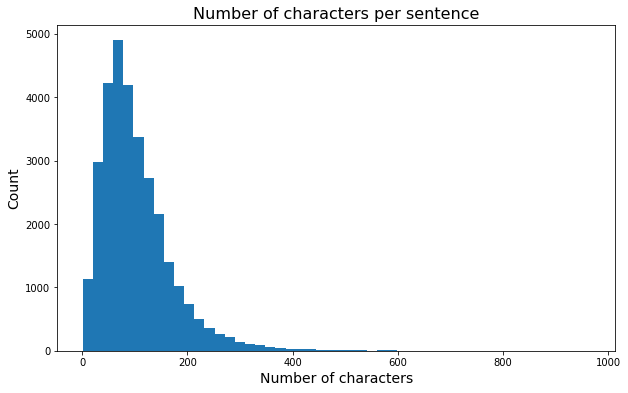

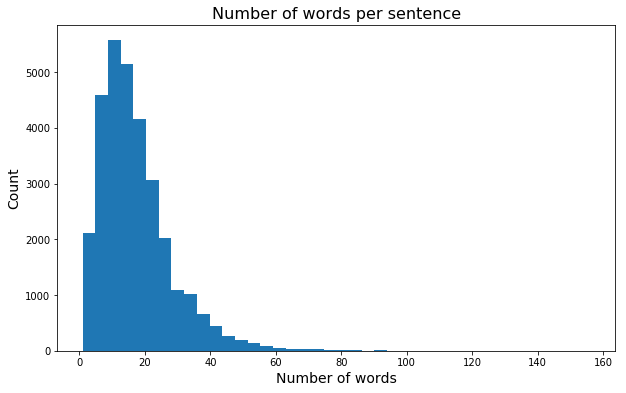

,stats,character values,word values
0,min,1.00,1.00
1,max,965.00,156.00
2,mean,102.37,17.17
3,median,88.00,15.00


In [11]:
sentence_eda(corpus_all, word_plot=True, character_plot=True)

# Word Frequency 

## Single single words

In [83]:
top_words = word_frequency(data_full["text"], max_features=200, min_df=10, ngram_range=(1,1))
top_words.head(10)

,words,counts
193,work,8551
169,staff,5933
49,employees,2228
131,people,2151
14,better,2134
180,time,2124
86,job,2071
127,organization,1994
116,need,1985
130,pay,1884


In [86]:
top_words = word_frequency(corpus_all, max_features=200, min_df=10, ngram_range=(1,1))
top_words.head(10)

,words,counts
193,work,6854
168,staff,5049
50,employees,1891
15,better,1891
133,people,1860
179,time,1743
88,job,1726
118,need,1696
110,management,1675
129,organization,1611


In [12]:
from wordcloud import WordCloud, STOPWORDS
?WordCloud

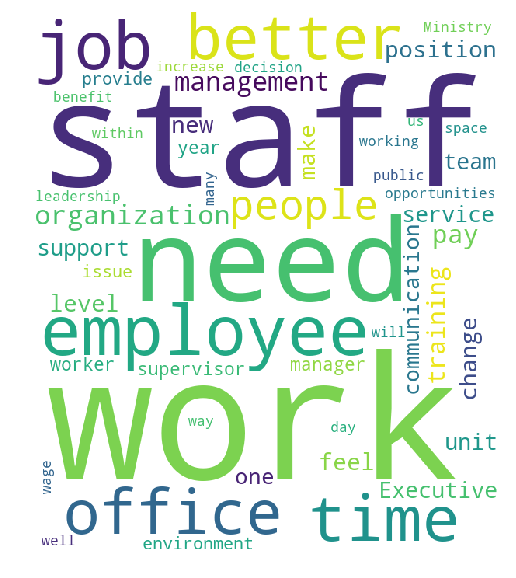

In [20]:
src.data.EDA_text.generate_WordCloud(corpus_all_str, height=700, width=600)

# n-grams

In [79]:
top_n_grams = word_frequency(data_full["text"], max_features=200, min_df=10, ngram_range=(2,4))

In [80]:
top_n_grams.head(10)

,words,counts
194,work unit,629
177,work environment,622
131,public service,576
179,work home,299
8,bc public,271
181,work life,264
75,life balance,252
182,work life balance,243
9,bc public service,237
24,cost living,222


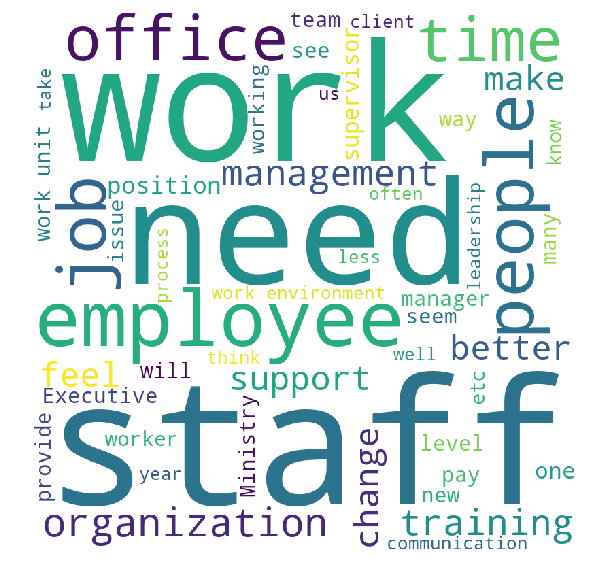

In [78]:
src.data.EDA_text.generate_WordCloud(corpus_all_str, collocations=True)

## Most Common Acronyms 

In [70]:
caps = re.findall(r'([A-Z]+\s?[A-Z]+[^a-z0-9\W])', corpus_all_str)
acronyms = src.data.EDA_text.word_frequency(caps, max_features=200, min_df=10)
acronyms.head()

,words,counts
0,adm,170
41,psa,108
35,mcfd,104
34,lws,74
27,icm,69
